## Relatório de Análise VIII

# Identificando e Removendo Outliers

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [19]:
dados = pd.read_csv('db/aluguel_residencial.csv', sep = ';')

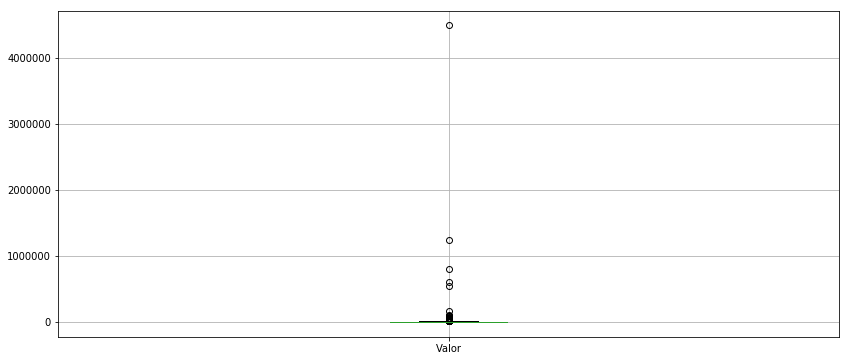

In [20]:
dados.boxplot(['Valor'])

In [21]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [22]:
valor = dados['Valor']

<img src='BoxPlot.png'>

In [23]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [24]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)

In [25]:
dados_new = dados[selecao]

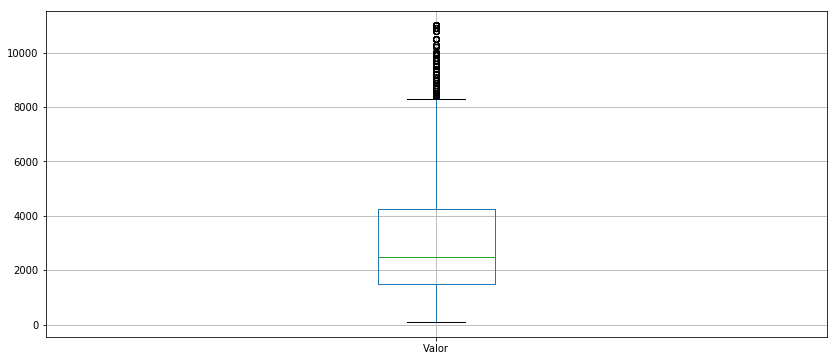

In [26]:
dados_new.boxplot(['Valor'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023905B9A898>]],
      dtype=object)

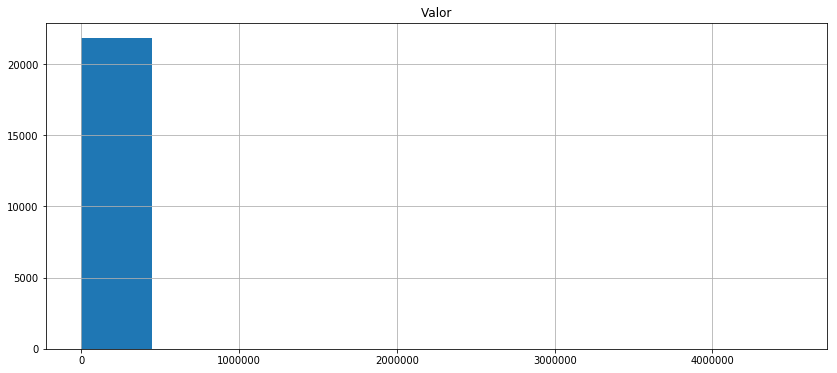

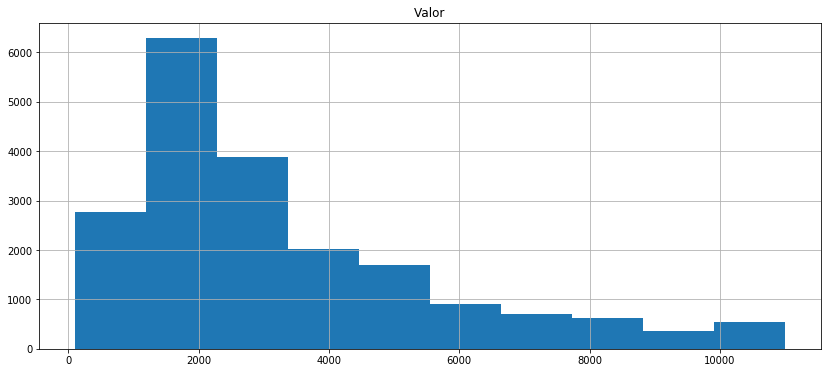

In [27]:
dados.hist('Valor')
dados_new.hist('Valor')

## Exercicio

In [28]:
dados_aluguel = pd.read_csv('DB/aluguel_amostra.csv', sep = ';')

In [29]:
dados_aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [30]:
valor_m2 = dados_aluguel['Valor m2']
valor_m2.describe()

count    10000.000000
mean        37.076363
std        175.295886
min          2.780000
25%         21.250000
50%         30.000000
75%         42.310000
max      15000.000000
Name: Valor m2, dtype: float64

In [31]:
Q1 = valor_m2.quantile(.25)
Q3 = valor_m2.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [32]:
print(f'Q1 é: {Q1}')
print(f'Q3 é: {Q3}')
print(f'IIQ é: {IIQ}')
print(f'Limite Inferior é: {limite_inferior}')
print(f'Limite Superior é: {limite_superior}')

Q1 é: 21.25
Q3 é: 42.31
IIQ é: 21.060000000000002
Limite Inferior é: -10.340000000000003
Limite Superior é: 73.9


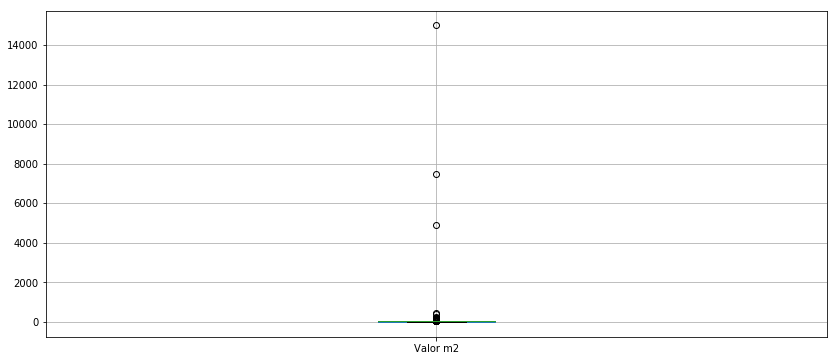

In [33]:
dados_aluguel.boxplot('Valor m2')

In [34]:
selecao = (dados_aluguel['Valor m2'] >= limite_inferior) & (dados_aluguel['Valor m2'] <= limite_superior)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023907379B70>]],
      dtype=object)

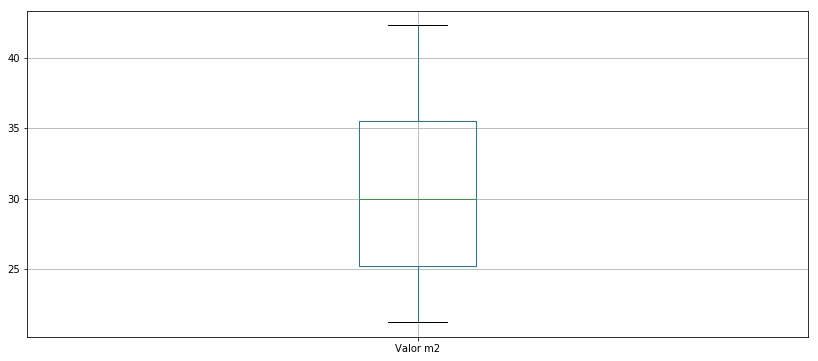

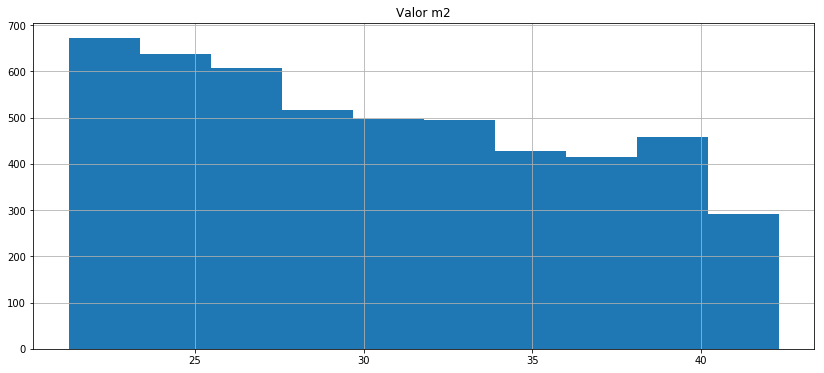

In [35]:
dados_aluguel_new = dados_aluguel[selecao]
dados_aluguel_new.boxplot(['Valor m2'])
dados_aluguel_new.hist(['Valor m2'])

## Identificando e Removendo Outliers (Continuação)

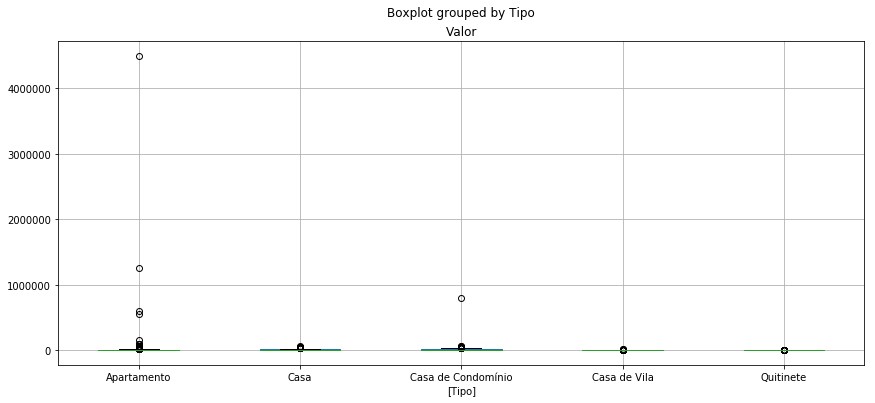

In [37]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [41]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [42]:
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [51]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [52]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [53]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [54]:
IIQ

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [55]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [56]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [58]:
limite_superior['Apartamento']

9950.0

In [64]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

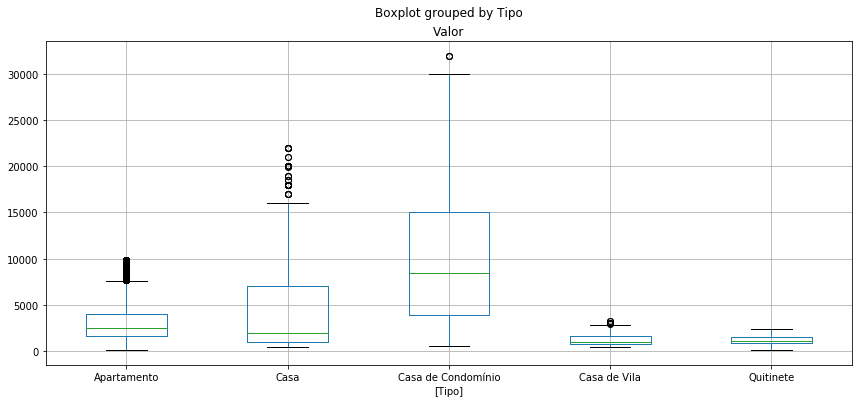

In [65]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [66]:
dados_new.to_csv('db/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

In [73]:
dados_new[dados_new['Valor'] > 30000].head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2371,Casa de Condomínio,Barra da Tijuca,5,6,4,1000,32000.0,3000.0,1700.0,32.00,Casa
11828,Casa de Condomínio,Barra da Tijuca,5,6,5,1200,32000.0,2134.0,17480.0,26.67,Casa
20212,Casa de Condomínio,Barra da Tijuca,5,4,5,850,32000.0,1510.0,15804.0,37.65,Casa
